In [1]:
import os
import copy
from coffea import hist
from coffea import util
import numpy as np
import itertools
import pandas as pd

In [2]:
directory = 'CoffeaOutputsForTriggerAnalysis/SingleMu/'

In [3]:
Data_num2016 = util.load(directory+'2016/TTbarRes_0l_SingleMu2016_Data_TriggerAnalysis.coffea')

In [4]:
print("-------Unweighted SingleMu2016_Data--------")
for i,j in Data_num2016['cutflow'].items():        
    print( '%20s : %12d' % (i,j) )

-------Unweighted SingleMu2016_Data--------
          all events :     90984718
events with Loose Jet ID :      6759338
events with pT,y Cut :       313536
events with two FatJets :       121298
events with >= oneTTbar :       121298
events with dPhi Cut :        60454
events with Good Subjets :        58691
events with jets cond1 :        18897
events with jets cond2 :        21244
events with jets cond3 :        22054
events with jets cond4 :        22326
events with jets Denom cond :        24187
jets cond1 with ak4cut :        80685
jets cond2 with ak4cut :        89010
jets cond3 with ak4cut :        91171
jets cond4 with ak4cut :        92010
jets Denom with ak4cut :        97110
numerator 1 in bin [200, 800] :           74
numerator 2 in bin [200, 800] :          233
numerator 3 in bin [200, 800] :          251
numerator 4 in bin [200, 800] :          267
denominator in bin [200, 800] :          484
numerator 1 in bin [1800, 2000] :          481
numerator 2 in bin [1800, 2000] :

In [5]:
def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise

In [6]:
def DoesDirectoryExist(mypath): #extra precaution (Probably overkill...)
    '''Checks to see if Directory exists before running mkdir_p'''
    import os.path
    from os import path
    
    if path.exists(mypath):
        pass
    else:
        mkdir_p(mypath)

In [7]:
import matplotlib.pyplot as plt
import warnings
import re # regular expressions
warnings.filterwarnings("ignore")

# ---- Reiterate categories ---- #
ttagcats = ["0t", ">=1t"]
# btagcats = ["0b", "1b", "2b"]
# ycats = ['cen', 'fwd']

# list_of_cats = [ t+b+y for t,b,y in itertools.product( ttagcats, btagcats, ycats) ]
# list_of_bcats = [ b+y for b,y in itertools.product( btagcats, ycats) ]

# # ---- List the Histograms Here ---- #
# list_of_hists = ('ttbarmass', 'jetpt', 'jeteta', 'jetphi', 'jety', 'jetdy', 'probept', 'probep')

In [8]:
maindirectory = os.getcwd() 

# Plots without uncertainty bars included

In [9]:
SaveDirectory = maindirectory + '/TriggerAnalysisPlots/2016/' # Directory where trigger analysis plots will be saved
DoesDirectoryExist(SaveDirectory) # no need to create the directory several times if it exists already

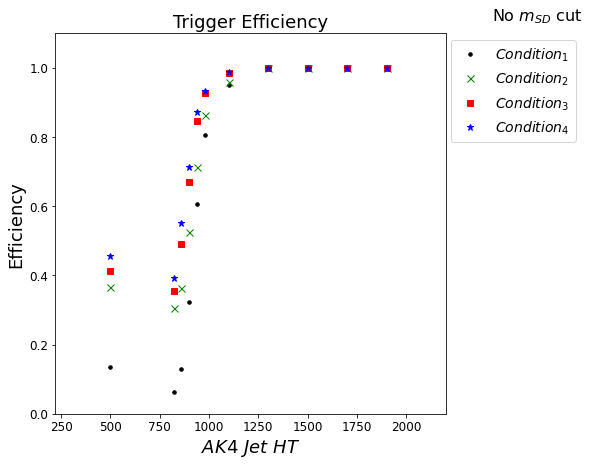

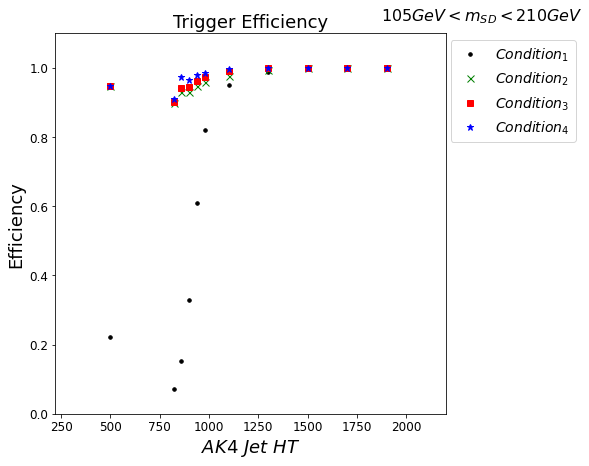

In [10]:
for cat in ttagcats:
    #---- Histogram Window Config. ----# 
    plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
    })
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(7,7),
    )
#     fig.subplots_adjust(hspace=.07)
    ax.set_title('Trigger Efficiency')
    
    Numerator1 = Data_num2016['condition1_numerator'].integrate('anacat', cat).integrate('dataset', 'SingleMu2016_Data')
    Numerator2 = Data_num2016['condition2_numerator'].integrate('anacat', cat).integrate('dataset', 'SingleMu2016_Data')
    Numerator3 = Data_num2016['condition3_numerator'].integrate('anacat', cat).integrate('dataset', 'SingleMu2016_Data')
    Numerator4 = Data_num2016['condition4_numerator'].integrate('anacat', cat).integrate('dataset', 'SingleMu2016_Data')
    Denominator = Data_num2016['condition_denominator'].integrate('anacat', cat).integrate('dataset', 'SingleMu2016_Data')
    
    # print(Denominator.values())
    
    # TestPlot = hist.plot1d(Denominator, ax=ax, clear=False, error_opts={'marker': '.', 'markersize': 7., 'color': 'k', 'elinewidth': 1})
    
    EffPlot1 = hist.plotratio(num = Numerator1, denom = Denominator, ax = ax, clear=False,
                   error_opts={'marker': '.', 'markersize': 7., 'color': 'k', 'elinewidth': 0})
                   #unc = 'num')
    EffPlot2 = hist.plotratio(num = Numerator2, denom = Denominator, ax = ax, clear=False,
                   error_opts={'marker': 'x', 'markersize': 7., 'color': 'g', 'elinewidth': 0})
                   #unc = 'num')
    EffPlot3 = hist.plotratio(num = Numerator3, denom = Denominator, ax = ax, clear=False,
                   error_opts={'marker': 's', 'markersize': 6., 'color': 'r', 'elinewidth': 0})
                   #unc = 'num')
    EffPlot4 = hist.plotratio(num = Numerator4, denom = Denominator, ax = ax, clear=False,
                   error_opts={'marker': '*', 'markersize': 7., 'color': 'b', 'elinewidth': 0})
                   #unc = 'num')
    
    ax.set_ylim(bottom=0.0, top=1.1)
    ax.set_xlim(220, 2200)
    ax.set_ylabel('Efficiency')
    leg = ax.legend(labels=[r'$Condition_1$',r'$Condition_2$',r'$Condition_3$',r'$Condition_4$'], bbox_to_anchor=(1.35, 1.), loc='upper right')
    
    Cat_legend_entry = None
    if cat == '0t':
        Cat_legend_entry = "No $m_{SD}$ cut"
        fnc = '_noSD'
    else:
        Cat_legend_entry = "$105GeV < m_{SD} < 210GeV$"
        fnc = '_SD'
    leg2 = plt.text(1.35, 1.07, Cat_legend_entry,
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes
               )
    filename = 'TriggerEffs_NOunc' + fnc +'.png'
    filename_zoom = 'TriggerEffs_NOunc_zoom' + fnc + '.png'
    # plt.savefig(SaveDirectory+filename_zoom, bbox_inches="tight")
    # print(SaveDirectory+filename_zoom)

# Plots with uncertainty bars included

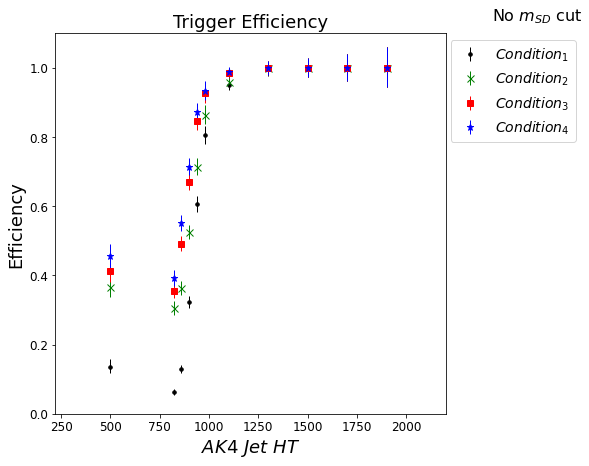

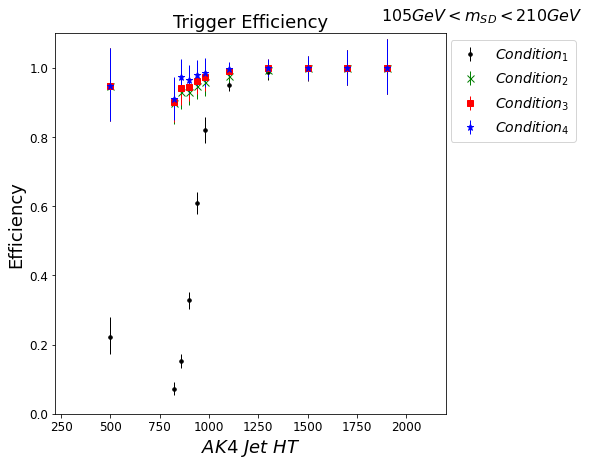

In [13]:
for cat in ttagcats:
    #---- Histogram Window Config. ----# 
    plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
    })
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(7,7),
    )
#     fig.subplots_adjust(hspace=.07)
    ax.set_title('Trigger Efficiency')
    
    Numerator1 = Data_num2016['condition1_numerator'].integrate('anacat', cat).integrate('dataset', 'SingleMu2016_Data')
    Numerator2 = Data_num2016['condition2_numerator'].integrate('anacat', cat).integrate('dataset', 'SingleMu2016_Data')
    Numerator3 = Data_num2016['condition3_numerator'].integrate('anacat', cat).integrate('dataset', 'SingleMu2016_Data')
    Numerator4 = Data_num2016['condition4_numerator'].integrate('anacat', cat).integrate('dataset', 'SingleMu2016_Data')
    Denominator = Data_num2016['condition_denominator'].integrate('anacat', cat).integrate('dataset', 'SingleMu2016_Data')
    
    # print(Denominator.values())
    
    # TestPlot = hist.plot1d(Denominator, ax=ax, clear=False, error_opts={'marker': '.', 'markersize': 7., 'color': 'k', 'elinewidth': 1})
    
    EffPlot1 = hist.plotratio(num = Numerator1, denom = Denominator, ax = ax, clear=False,
                   error_opts={'marker': '.', 'markersize': 7., 'color': 'k', 'elinewidth': 1},
                   unc = 'num')
    EffPlot2 = hist.plotratio(num = Numerator2, denom = Denominator, ax = ax, clear=False,
                   error_opts={'marker': 'x', 'markersize': 7., 'color': 'g', 'elinewidth': 1},
                   unc = 'num')
    EffPlot3 = hist.plotratio(num = Numerator3, denom = Denominator, ax = ax, clear=False,
                   error_opts={'marker': 's', 'markersize': 6., 'color': 'r', 'elinewidth': 1},
                   unc = 'num')
    EffPlot4 = hist.plotratio(num = Numerator4, denom = Denominator, ax = ax, clear=False,
                   error_opts={'marker': '*', 'markersize': 7., 'color': 'b', 'elinewidth': 1},
                   unc = 'num')
    
    ax.set_ylim(bottom=0.0, top=1.1)
    ax.set_xlim(220, 2200)
    ax.set_ylabel('Efficiency')
    leg = ax.legend(labels=[r'$Condition_1$',r'$Condition_2$',r'$Condition_3$',r'$Condition_4$'], bbox_to_anchor=(1.35, 1.), loc='upper right')
    
    Cat_legend_entry = None
    if cat == '0t':
        Cat_legend_entry = "No $m_{SD}$ cut"
        fnc = '_noSD'
    else:
        Cat_legend_entry = "$105GeV < m_{SD} < 210GeV$"
        fnc = '_SD'
    leg2 = plt.text(1.35, 1.07, Cat_legend_entry,
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes
               )
    filename = 'TriggerEffs_unc' + fnc +'.png'
    filename_zoom = 'TriggerEffs_unc_zoom' + fnc + '.png'
    plt.savefig(SaveDirectory+filename, bbox_inches="tight")
    # print(SaveDirectory+filename)
    